# OCR表格识别实战

本节将介绍如何使用PaddleOCR完成表格识别算法的训练与运行，包括：

1. 理解表格识别算法原理
3. 掌握PaddleOCR表格识别代码的训练和预测流程


## 1. 快速体验
快速演示 PP-Structure 预测，首先下载PaddleOCR代码并安装依赖包

In [1]:
# clone PaddleOCR代码
# ! git  clone https://github.com/PaddlePaddle/PaddleOCR

# 安装依赖包
! pip install -U pip
! pip install -U https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl
! pip install -r PaddleOCR/requirements.txt
! pip install pandas

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl (19.1 MB)
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


安装完成后，通过下面命令即可快速完成表格的识别

In [ ]:
# 切换到工作目录
import os
os.chdir('/home/aistudio/PaddleOCR/ppstructure')

In [ ]:
# 下载模型
! mkdir inference && cd inference
# 下载超轻量级表格英文OCR模型的检测模型并解压
! wget -P ./inference/ https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_det_infer.tar && cd inference && tar xf ch_PP-OCRv2_det_infer.tar && cd ..
# 下载超轻量级表格英文OCR模型的识别模型并解压
! wget -P ./inference/ https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_rec_infer.tar && cd inference && tar xf ch_PP-OCRv2_rec_infer.tar && cd ..
# 下载超轻量级英文表格英寸模型并解压
! wget -P ./inference/ https://paddleocr.bj.bcebos.com/dygraph_v2.0/table/en_ppocr_mobile_v2.0_table_structure_infer.tar && cd inference && tar xf en_ppocr_mobile_v2.0_table_structure_infer.tar && cd ..

mkdir: cannot create directory ‘inference’: File exists
--2021-12-25 20:46:49--  https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_det_infer.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|182.61.200.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3190272 (3.0M) [application/x-tar]
Saving to: ‘./inference/ch_PP-OCRv2_det_infer.tar.2’

ch_PP-OCRv2_det_inf 100%[===================>]   3.04M  6.77MB/s    in 0.4s    

2021-12-25 20:46:49 (6.77 MB/s) - ‘./inference/ch_PP-OCRv2_det_infer.tar.2’ saved [3190272/3190272]

--2021-12-25 20:46:50--  https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_rec_infer.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.c

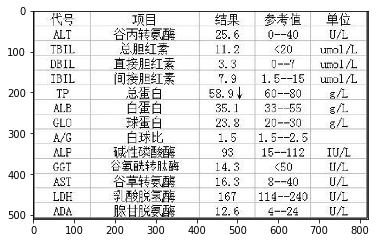

In [ ]:
# 先是输入图像

import cv2
from matplotlib import pyplot as plt
%matplotlib inline

# 读取表格图像并显示
img = cv2.imread('/home/aistudio/1.jpg')
plt.imshow(img)

In [ ]:
# https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppstructure/table/predict_table.py#L55

from table.predict_table import TableSystem,to_excel
from utility import init_args
# 初始化参数
args = init_args().parse_args(args=[])
args.det_model_dir='inference/ch_PP-OCRv2_det_infer'
args.rec_model_dir='inference/ch_PP-OCRv2_rec_infer'
args.table_model_dir='inference/en_ppocr_mobile_v2.0_table_structure_infer'
args.image_dir='/home/aistudio/1.jpg'
args.rec_char_dict_path='../ppocr/utils/ppocr_keys_v1.txt'
args.table_char_dict_path='../ppocr/utils/dict/table_structure_dict.txt'
args.det_limit_side_len=736
args.det_limit_type='min'
args.output='../output/table'
args.use_gpu=False

# 初始化表格识别系统
table_sys = TableSystem(args)
img = cv2.imread('/home/aistudio/1.jpg')
# 执行表格识别
pred_html = table_sys(img)
# 结果存储到excel文件
to_excel(pred_html,'1.xlsx')
print(pred_html)

[2021/12/26 19:55:37] root DEBUG: dt_boxes num : 69, elapse : 2.900609254837036
[2021/12/26 19:55:43] root DEBUG: rec_res num  : 69, elapse : 5.992196321487427
<html><body><table><thead><tr><td>代号</td><td>项目</td><td>结果</td><td>参考值</td><td>单位</td></tr></thead><tbody><tr><td>ALT</td><td>谷丙转氨酶</td><td>25.6</td><td>0--40</td><td>U/L</td></tr><tr><td>TBIL</td><td>总胆红素</td><td>11.2</td><td><20</td><td>UMOL/L</td></tr><tr><td>DBIL</td><td>直接胆红素</td><td>3.3</td><td>0--7</td><td>UMOL/L</td></tr><tr><td>IBIL</td><td>间接胆红素</td><td>7.9</td><td>1.5--15</td><td>UMOL/L</td></tr><tr><td>TP</td><td>总蛋白</td><td>58.9J</td><td>60--80</td><td>g/L</td></tr><tr><td>ALB</td><td>白蛋白</td><td>35.1</td><td>33--55</td><td>g/L</td></tr><tr><td>GLO</td><td>球蛋白</td><td>23.8</td><td>20--30</td><td>8/L</td></tr><tr><td>A/G</td><td>白球比</td><td>1.5</td><td>1.5--2.5</td><td></td></tr><tr><td>ALP</td><td>碱性磷酸酶</td><td>93</td><td>15--112</td><td>HUSL</td></tr><tr><td>GGT</td><td>谷氨酰转肽酶</td><td>14.3</td><td><50</td><td>U/L</

In [ ]:
# 读取excel并显示
import pandas as pd
df = pd.read_excel('1.xlsx').fillna('')
print(df)

      代号      项目     结果       参考值      单位
0    ALT   谷丙转氨酶   25.6     0--40     U/L
1   TBIL    总胆红素   11.2       <20  UMOL/L
2   DBIL   直接胆红素    3.3      0--7  UMOL/L
3   IBIL   间接胆红素    7.9   1.5--15  UMOL/L
4     TP     总蛋白  58.9J    60--80     g/L
5    ALB     白蛋白   35.1    33--55     g/L
6    GLO     球蛋白   23.8    20--30     8/L
7    A/G     白球比    1.5  1.5--2.5        
8    ALP   碱性磷酸酶     93   15--112    HUSL
9    GGT  谷氨酰转肽酶   14.3       <50     U/L
10   AST   谷草转氨酶   16.3     8--40     W/L
11   LDH   乳酸脱氢酶    167  114--240     U/L
12   ADA   腺甘脱氨酶   12.6     4--24     U/L


## 2. 预测原理详解：

### 2.1 整体pipeline介绍

PP-Structure 的表格识别模型算法属于基于端到端的方法

表格识别算法由三个模型组成：
1. 文字检测模型：用于检测表格里的文本
2. 文字识别模型：用于对检测到的文本进行识别
3. 表格单元格预测和表格结构预测模型：用于预测表格结构的HTML信息和表格单元格坐标

三个模型的串联过程如下图所示：

<center class="img">
<img src="https://ai-studio-static-online.cdn.bcebos.com/07fad4f0bc6a473f9258d913a9afc380c3cd582cc44f4d0fa4cdbade934e07b5" width="1300"/></center>
<center>图 1：表格识别pipeline</center>


具体过程为：
1. 使用文字检测模型用于检测表格里的文本
2. 使用文字识别模型对检测到的文本进行识别，到这一步，我们拿到了文字的框和文字信息
3. 使用表格单元格预测和表格结构预测模型进行单元格坐标预测和表格结构的HTML信息预测
4. 对2中的文字框和3中的单元格坐标进行聚合，如下图所示，根据<font color="#dd0000">红色的文字检测框和蓝色的单元格坐标检测框之间的IOU</font>进行判定是否需要聚合。
5. 在完成文本框聚合之后，对文本框进行一个从上到下，从左到右的排序，根据排序后文本框的索引即可拿到对应的文字信息，然后文字信息做一个<font color="#dd0000">字符串拼接</font>即可得到最终单元格里的文本内容。

<center class="img">
<img src="https://ai-studio-static-online.cdn.bcebos.com/32a7368a59f142dcb735247fa7537ae1681c5541f92444388bd916a942fcdfa5" width="1300"/></center>
<center>图 2：文字框和单元格坐标聚合示意图</center>

### 2.2 表格结构预测模型介绍

表格识别需要三个模型：文字检测，文字识别和表格结构识别模型。文字检测和识别模型在前面的课程中已经介绍，这里重点介绍表格结构预测模型。

表格结构预测模型完成了表格结构的预测和表格单元格坐标的检测。表格结构模型由RARE算法改动而来, 主要在下面几个方面进行了改动

#### 2.2.1 输入数据

对于文字识别模型，数据集标注的每个字符的独立的，但是在表格结构预测模型中，要求预测的类别不是单个字符，下面是RARE和表格结构预测模型的词典对比：

|模型| 字典|
|---|---|
|RARE|`'<', 's', 'u', 'p', '>', '<', '/', 's', 'u', 'b', '>', '<', 'b', '>', '<', '/', 'b', '>', '<', 'i', '>', '<', '/', 'i', '>’`|
|表格结构预测模型|`'sos', '<thead>', '<tr>', '<td>', '</td>', '</tr>', '</thead>', '<tbody>', '</tbody>', '<td', ' colspan="5"', '>', ' colspan="2"', ' colspan="3"', ' rowspan="2"', ' colspan="4"', ' colspan="6"', ' rowspan="3"', ' colspan="9"', ' colspan="10"', ' colspan="7"', ' rowspan="4"', ' rowspan="5"', ' rowspan="9"', ' colspan="8"', ' rowspan="8"', ' rowspan="6"', ' rowspan="7"', ' rowspan="10"', 'eos'`|

在表格结构预测模型中，<font color="#dd0000">将`<thead>`这类字符串视为一个字符来进行识别</font>。

#### 2.2.2 模型

表格结构识别模型和EARE的对比图如下

<center class="img">
<img src="https://ai-studio-static-online.cdn.bcebos.com/6f08c91824954cb0aba30d816e2d493c58193463acd34a12a366129cc5f89458" width="1300"/></center>
<center>图 3：表格结构识别模型示意图</center>


RARE模型由TPS+CNN+RNN+AttentionHead组成,各个部分的主要作用如下：
1. TPS：对弯曲的文本进行校正，使图像恢复到水平
2. CNN：对图像进行特征提取
3. RNN：对提取的特征进行进一步的增强，提取语义方面的特征
3. AttentionHead：进行输出

在表格结构识别模型中，输入的图像为整张图像，因此移除TPS模块，另外通过实验证明RNN对结果影响不大，因此移除RNN模块，最终表格结构识别模型的结构为CNN+AttentionHead。

为了输出单元格的坐标，尝试了再检测模型里进行单元格坐标的检测，在DB模型的基础上尝试了下面的方案2，3

|方案| 结果|
|---|---|
|1. 单行文本检测|<center class="img"><img src="https://ai-studio-static-online.cdn.bcebos.com/cd8b4dd7df4d411086ba6dd455afcb7b6ab130639aad4607b05293876c64c419" width="1300"/></center>|
|2. 文本和单元格用一个模型检测|<center class="img"><img src="https://ai-studio-static-online.cdn.bcebos.com/d93353bacff74545b663be245102d03b716535221f15465284591987144d9fb8" width="1300"/></center>|
|3. 文本和单元格用两个模型检测|<center class="img"><img src="https://ai-studio-static-online.cdn.bcebos.com/a84881137cdd49d593abad35bb91f18d31cd49c9e2f44292aa33d7948e43d977" width="1300"/></center>|

可以看到，在分割模型中完成文本和单元格的检测会导致GT的奇义性: Cell里每一行之间背景的GT是文本还是背景?

在整个表格识别Pipeline的三个模型中，只有文字检测和表格结构识别模型能够获取到整张图像的信息，因此，在表格结构识别模型的AttentionHead中额外添加一个基于回归的分支来完成单元格的坐标(x0,y0,x1,y1)检测

### 2.3 表格结构预测模型前向分析

模型前向分析通过分析图像输入从预处理到网络输出之间各个模块里的输出shape变化，来更好的了解表格单元格预测和表格结构预测模型，涉及到的模块如下：
 
 |类型|模块名称|
 |---|---|
 |数据处理|ResizeTableImage|
 |数据处理|PaddingTableImage|
 |Backbone|MobileNetV3|
 |Head|TableAttentionHead|

#### 2.3.1 输入数据处理
本例中输入图像和数据处理模块输出可视化如下：

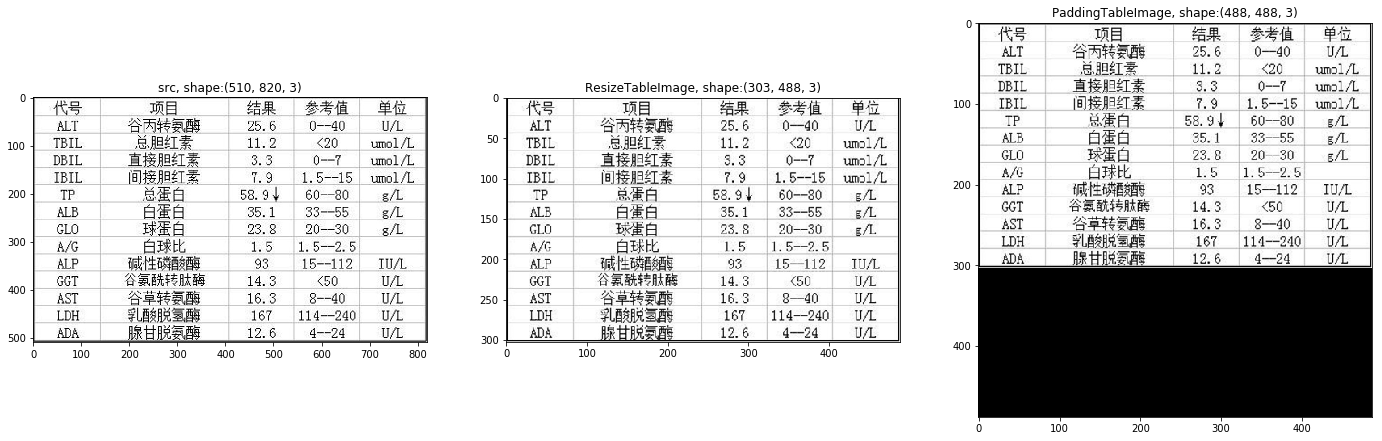

In [ ]:
# 切换到PaddleOCR目录
os.chdir('/home/aistudio/PaddleOCR')
from ppocr.data import create_operators, transform
plt.figure(figsize=(24,8))

# 读取输入图像
img = cv2.imread('/home/aistudio/1.jpg')

# 显示输入图像
plt.subplot(1,3,1)
plt.title('src, shape:{}'.format(img.shape))
plt.imshow(img)

# 执行 ResizeTableImage
# https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppocr/data/imaug/gen_table_mask.py#L182

pre_process_list = [{'ResizeTableImage': {'max_len': args.table_max_len }}]  # 将图片长边缩放到指定长度，短边进行等比缩放
preprocess_op = create_operators(pre_process_list)
data = {'image': img}
data = transform(data, preprocess_op)

# 显示 ResizeTableImage 后的图像
plt.subplot(1,3,2)
plt.title('ResizeTableImage, shape:{}'.format(data['image'].shape))
plt.imshow(data['image'])

# 执行 PaddingTableImage
# https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppocr/data/imaug/gen_table_mask.py#L232

pre_process_list = [{'PaddingTableImage': None}]
preprocess_op = create_operators(pre_process_list)

data = transform(data, preprocess_op)

# 显示 PaddingTableImage 后的图像
plt.subplot(1,3,3)
plt.title('PaddingTableImage, shape:{}'.format(data['image'].shape))
plt.imshow(data['image']/255)
plt.show()

# 定义完整的处理op列表
pre_process_list = [
    {'ResizeTableImage': {'max_len': args.table_max_len }},
    {'NormalizeImage':{'scale':1./255., 'mean': [0.485, 0.456, 0.406],'std': [0.229, 0.224, 0.225], 'order': 'hwc'}},
    {'PaddingTableImage': None},
    {'ToCHWImage': None}
] 
# 创建op列表
preprocess_op = create_operators(pre_process_list)
# 执行op列表
data = {'image': img}
data = transform(data, preprocess_op)

In [ ]:
# 下载预训练模型
! wget -P ./pre_train/ https://paddleocr.bj.bcebos.com/dygraph_v2.1/table/en_ppocr_mobile_v2.0_table_structure_train.tar && cd pre_train && tar xf en_ppocr_mobile_v2.0_table_structure_train.tar && cd ..
# 下载的预训练模型
import paddle

# 读取预训练参数，并分为 backbone 参数和 head 参数
pretrain_params = paddle.load('/home/aistudio/PaddleOCR/pre_train/en_ppocr_mobile_v2.0_table_structure_train/best_accuracy.pdparams')
def filter_params(pretrain_params,prefix):
    new_dict = {}
    for k,v in pretrain_params.items():
        if k.startswith(prefix):
            new_dict[k.replace(prefix+'.','')] = v
    return new_dict
# 抽取参数
backbone_dict = filter_params(pretrain_params,'backbone')
head_dict = filter_params(pretrain_params,'head')

--2021-12-26 19:56:07--  https://paddleocr.bj.bcebos.com/dygraph_v2.1/table/en_ppocr_mobile_v2.0_table_structure_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|182.61.200.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76103680 (73M) [application/x-tar]
Saving to: ‘./pre_train/en_ppocr_mobile_v2.0_table_structure_train.tar.3’

en_ppocr_mobile_v2. 100%[===================>]  72.58M  36.6MB/s    in 2.0s    

2021-12-26 19:56:09 (36.6 MB/s) - ‘./pre_train/en_ppocr_mobile_v2.0_table_structure_train.tar.3’ saved [76103680/76103680]



#### 2.3.2 Backbone

backbone和检测的backbone一致，均输出尺寸为输入图像 1/4,1/8,1/16和1/32 的四个特征图。相关backbone在文本检测章节已经介绍过了，这里不再赘述。

In [ ]:
# https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppocr/modeling/backbones/det_mobilenet_v3.py

from ppocr.modeling.backbones import build_backbone
# 初始化 backbone
backbone = build_backbone(dict(name='MobileNetV3',scale=1.0,model_name='large'),model_type='table')
backbone.eval()
# 加载 backbone 参数
backbone.set_state_dict(backbone_dict)

In [ ]:
import numpy as np
x = np.expand_dims(data['image'],axis=0)
x = paddle.to_tensor(x)
backbone_out = backbone(x)
for item in backbone_out:
    print(item.shape)

[1, 24, 122, 122]
[1, 40, 61, 61]
[1, 112, 31, 31]
[1, 960, 16, 16]


#### 2.3.3 Head

Head的输入为backbone输出的四个特征图，输出为表格结构和单元格坐标的预测结果

输入参数含义为：
|参数|含义|
|---|---|
|in_channels|输入特征图的通道数|
|hidden_size|Attention里RNN模块的隐藏层单元|
|max_elem_length|最大预测字符的数量|
|in_max_len| 输入图像的尺寸|
|loc_type|输出单元格坐标分支的输入<br>1：仅使用Attention后的隐藏层 <br>2：融合CNN部分+Attention部分|


其代码如下

In [ ]:
# https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppocr/modeling/heads/table_att_head.py

from paddle import nn
import paddle.nn.functional as F
from ppocr.modeling.heads.table_att_head import AttentionGRUCell

class TableAttentionHead(nn.Layer):
    def __init__(self,
                 in_channels,
                 hidden_size,
                 loc_type=2,
                 in_max_len=488,  # 输入图像的尺寸
                 max_elem_length=800, # 输出的最大标签数量
                 **kwargs):
        super(TableAttentionHead, self).__init__()
        self.input_size = in_channels[-1]
        self.hidden_size = hidden_size
        self.elem_num = 30
        self.max_elem_length = max_elem_length

        self.structure_attention_cell = AttentionGRUCell(
            self.input_size, hidden_size, self.elem_num, use_gru=False)
        self.structure_generator = nn.Linear(hidden_size, self.elem_num)
        self.loc_type = loc_type
        self.in_max_len = in_max_len
        
        # 坐标框回归分支
        if self.loc_type == 1:
            self.loc_generator = nn.Linear(hidden_size, 4)
        else:
            if self.in_max_len == 640:
                # 640经过backbone后最后一个特征图为 20*20，因此这里输入的特征图大小为400
                self.loc_fea_trans = nn.Linear(400, self.max_elem_length + 1)
            elif self.in_max_len == 800:
                # 800 经过backbone后最后一个特征图为 23*25，因此这里输入的特征图大小为625
                self.loc_fea_trans = nn.Linear(625, self.max_elem_length + 1)
            elif self.in_max_len == 488:
                # 800 经过backbone后最后一个特征图为 16*16，因此这里输入的特征图大小为256
                self.loc_fea_trans = nn.Linear(256, self.max_elem_length + 1)
            self.loc_generator = nn.Linear(self.input_size + hidden_size, 4)

    def _char_to_onehot(self, input_char, onehot_dim):
        input_ont_hot = F.one_hot(input_char, onehot_dim)
        return input_ont_hot

    def forward(self, inputs, targets=None):
        # 取出backbone输出的最小map
        fea = inputs[-1]
        if len(fea.shape) == 3:
            pass
        else:
            # B,C,H,W reshape 为 B,C,H*W
            last_shape = int(np.prod(fea.shape[2:])) 
            fea = paddle.reshape(fea, [fea.shape[0], fea.shape[1], last_shape])
            # B,C,W 改为 B,W,C
            fea = fea.transpose([0, 2, 1])
        batch_size = fea.shape[0]

        hidden = paddle.zeros((batch_size, self.hidden_size))
        output_hiddens = []
        if self.training and targets is not None:
            structure = targets[0]
            for i in range(self.max_elem_length + 1):
                elem_onehots = self._char_to_onehot(
                    structure[:, i], onehot_dim=self.elem_num)
                (outputs, hidden), alpha = self.structure_attention_cell(
                    hidden, fea, elem_onehots)
                output_hiddens.append(paddle.unsqueeze(outputs, axis=1))
            output = paddle.concat(output_hiddens, axis=1)
            structure_probs = self.structure_generator(output)
            if self.loc_type == 1:
                loc_preds = self.loc_generator(output)
                loc_preds = F.sigmoid(loc_preds)
            else:
                loc_fea = fea.transpose([0, 2, 1])
                loc_fea = self.loc_fea_trans(loc_fea)
                loc_fea = loc_fea.transpose([0, 2, 1])
                loc_concat = paddle.concat([output, loc_fea], axis=2)
                loc_preds = self.loc_generator(loc_concat)
                loc_preds = F.sigmoid(loc_preds)
        else:
            temp_elem = paddle.zeros(shape=[batch_size], dtype="int32")
            structure_probs = None
            loc_preds = None
            elem_onehots = None
            outputs = None
            alpha = None
            max_elem_length = paddle.to_tensor(self.max_elem_length)
            i = 0
            # Attention forward
            while i < max_elem_length + 1:
                elem_onehots = self._char_to_onehot(
                    temp_elem, onehot_dim=self.elem_num)
                (outputs, hidden), alpha = self.structure_attention_cell(
                    hidden, fea, elem_onehots)
                output_hiddens.append(paddle.unsqueeze(outputs, axis=1))
                structure_probs_step = self.structure_generator(outputs)
                temp_elem = structure_probs_step.argmax(axis=1, dtype="int32")
                i += 1

            output = paddle.concat(output_hiddens, axis=1)
            print('Attention output shape',output.shape)
            # 表格结构分支
            structure_probs = self.structure_generator(output)
            structure_probs = F.softmax(structure_probs)

            # 单元格坐标分支
            if self.loc_type == 1:
                loc_preds = self.loc_generator(output)
                loc_preds = F.sigmoid(loc_preds)
            else:
                # B,W,C 改为 B,C,W
                loc_fea = fea.transpose([0, 2, 1])

                loc_fea = self.loc_fea_trans(loc_fea)
                loc_fea = loc_fea.transpose([0, 2, 1])
                loc_concat = paddle.concat([output, loc_fea], axis=2)
                loc_preds = self.loc_generator(loc_concat)
                loc_preds = F.sigmoid(loc_preds)
        return {'structure_probs': structure_probs, 'loc_preds': loc_preds}

In [ ]:
# 初始化 head
head = TableAttentionHead(in_channels=backbone.out_channels,hidden_size=256,loc_type=2)
head.eval()
# 加载 head 参数
head.set_state_dict(head_dict)

# 执行 head
print('*'*10,'head forward shape','*'*10)
head_out = head(backbone_out)
print('*'*10,'head out shape','*'*10)

# 打印 head 输出和对应的 shape
for key in head_out:
    print(key,head_out[key].shape)

********** head forward shape **********
Attention output shape [1, 801, 256]
********** head out shape **********
structure_probs [1, 801, 30]
loc_preds [1, 801, 4]


**后处理**

后处理的字典文件为 ppocr/utils/dict/table_structure_dict.txt

后处理解码思路：

1. 对 structure_probs 进行CTC解码: 不要背景字符sos和eos，连续重复的字符只取一个
2. 输出的坐标为归一化到0-1的值，对坐标乘上图片宽高，decode到图像空间

['<html>', '<body>', '<table>', '<thead>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '</thead>', '<tbody>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', 

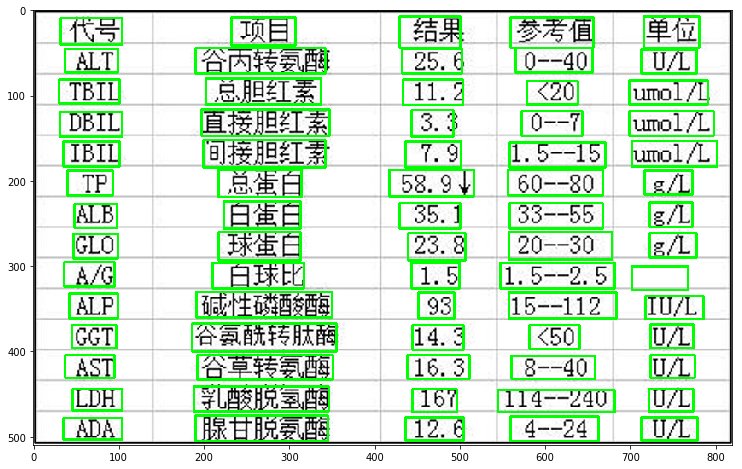

In [ ]:
# https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppocr/postprocess/rec_postprocess.py#L441

from ppocr.postprocess.rec_postprocess import TableLabelDecode

def post_process(out):
    character_dict_path = '/home/aistudio/PaddleOCR/ppocr/utils/dict/table_structure_dict.txt'
    # 初始化后处理 op
    post_op = TableLabelDecode(character_dict_path)

    post_result = post_op(out)
    
    structure_str_list = post_result['structure_str_list']

    # 归一化的坐标回复到原图大小
    res_loc = post_result['res_loc']
    imgh, imgw = img.shape[0:2]
    res_loc_final = []
    for rno in range(len(res_loc[0])):
        x0, y0, x1, y1 = res_loc[0][rno]
        left = max(int(imgw * x0), 0)
        top = max(int(imgh * y0), 0)
        right = min(int(imgw * x1), imgw - 1)
        bottom = min(int(imgh * y1), imgh - 1)
        res_loc_final.append([left, top, right, bottom])
    
    # 结构信息处理
    structure_str_list = structure_str_list[0]
    structure_str_list = ['<html>', '<body>', '<table>'] + structure_str_list + ['</table>', '</body>', '</html>']
    return structure_str_list,res_loc_final
structure_str_list,res_loc_final = post_process(head_out)

print(structure_str_list)
print(res_loc_final)

# 可视化预测 box
plt.figure(figsize=(24,8))
img_show = img.copy()
for box in res_loc_final:
    cv2.rectangle(img_show, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
plt.imshow(img_show)

## 3. 训练

训练表格识别，需要训练三个模型，分别为文本检测，文本识别，表格结构模型，文本检测和识别的训练可以参考之前课程，这里只介绍表格结构模型的训练过程。

本节以pubtabnet数据集、MobileNetV3作为骨干网络的表格结构模型模型介绍如何完成表格结构模型的训练、评估与测试。


### 3.1 数据准备

本次实验选取PubTabNet数据集作为我们的演示数据集。PubTabNet数据集的样例图如下图所示：
<center class="img">
<img src="https://ai-studio-static-online.cdn.bcebos.com/9732a3b97aff4a4194c5aec210400a8b0031c4f1887548d78f92f6941db0a6bd" width="1300"/></center>
<center>图 4：PubTabNet数据集示意图</center>

项目中已经下载了PubTabNet的部分数据集，存放在 /home/aistudio/data/data119702 中，可以运行如下指令完成数据集解压，或者从 [https://github.com/ibm-aur-nlp/PubTabNet](https://github.com/ibm-aur-nlp/PubTabNet) 中自行下载。

 

In [ ]:
# 解压数据集
! cd /home/aistudio/data/data119702 && tar -xf pubtabnet_val.tar  && cd -
! ls /home/aistudio/data/data119702

/home/aistudio/PaddleOCR
PubTabNet_2.0.0_val.jsonl  pubtabnet_val.tar  val


运行上述指令后 `/home/aistudio/data/data119702` 有一个文件夹和一个文件，分别是：
```bash
/home/aistudio/data/data119702
  └─ val/        		 	图片存放文件夹
  └─ PubTabNet_2.0.0_val.jsonl/         标注信息
```

该数据集的标注格式为

```json
{
   'filename': PMC5755158_010_01.png,							# 图像名
   'split': ’train‘, 									# 图像属于训练集还是验证集
   'imgid': 0,								 		# 图像的index
   'html': {
     'structure': {'tokens': ['<thead>', '<tr>', '<td>', ...]}, 			# 表格的HTML字符串
     'cell': [
       {
         'tokens': ['P', 'a', 'd', 'd', 'l', 'e', 'P', 'a', 'd', 'd', 'l', 'e'], 	# 表格中的单个文本
         'bbox': [x0, y0, x1, y1]  							# 表格中的单个文本的坐标
       }
     ]
   }
}
```

### 3.2 数据预处理

练时对输入图片的格式、大小有一定的要求。所以，在数据输入模型前，需要对数据进行预处理操作，使得图片和标签满足网络训练和预测的需要。

表格结构模型的数据预处理主要班刊下面几个：

* DecodeImage，将图像转为Numpy格式
* ResizeTableImage，对图片进行resize，长边resize到指定尺寸，短边等比例缩放
* TableLabelEncode，解析标注文件中的标签信息，并按统一格式进行保存
* NormalizeImage，通过规范化手段，把神经网络每层中任意神经元的输入值分布改变成均值为0，方差为1的标准正太分布，使得最优解的寻优过程明显会变得平缓，训练过程更容易收敛；
* PaddingTableImage，对图像的短边进pad，将其pad到和长边一样的尺寸
* ToCHWImage，图像的数据格式为[H, W, C]（即高度、宽度和通道数），而神经网络使用的训练数据的格式为[C, H, W]，因此需要对图像数据重新排列，例如[224, 224, 3]变为[3, 224, 224]；
* KeepKeys，dict过滤

**TableLabelEncode**

解析标签文件中的标签信息，首先加载标注数据并取出一条标注

In [ ]:
# 加载数据集里的一条数据
import json
from pprint import pprint
with open('/home/aistudio/data/data119702/PubTabNet_2.0.0_val.jsonl', "rb") as f:
    data_lines = f.readlines()
    for line in data_lines:
        data_line = line.decode('utf-8').strip("\n")
        info = json.loads(data_line)
        break

运行下述代码观察 TableLabelEncode 类编码标签前后的对比。

In [ ]:
from ppocr.data.imaug import TableLabelEncode
# 初始化 label 编码器
label_eocoder_op = TableLabelEncode(max_text_length=100,# 未使用
                                    max_elem_length=50, # 每张图最多预测多少个cel
                                    max_cell_num=500, # 未使用
                                    character_dict_path='ppocr/utils/dict/table_structure_dict.txt')
# 构建输入数据
cells = info['html']['cells']
structure = info['html']['structure']
# 2. 打印解码前的标签
print("The cells and structure before decode")
print("cells: ", cells)
print("structure: ", structure)

image = cv2.imread(os.path.join('/home/aistudio/data/data119702/val', info['filename']))
data = {'image':image,'cells': cells, 'structure':structure}
# 执行 label 编码器
data = label_eocoder_op(data)
# 打印编码后的信息
print("The bbox_list and structure after decode")
print("bbox_list:",data['bbox_list'].tolist())
print("structure:", data['structure'].tolist())

The cells and structure before decode
cells:  [{'tokens': []}, {'tokens': ['<b>', 'W', 'e', 'a', 'n', 'i', 'n', 'g', '</b>'], 'bbox': [66, 4, 96, 13]}, {'tokens': ['<b>', 'W', 'e', 'e', 'k', ' ', '1', '5', '</b>'], 'bbox': [131, 4, 160, 13]}, {'tokens': ['<b>', 'O', 'f', 'f', '-', 't', 'e', 's', 't', '</b>'], 'bbox': [201, 4, 226, 13]}, {'tokens': ['W', 'e', 'a', 'n', 'i', 'n', 'g'], 'bbox': [1, 17, 31, 26]}, {'tokens': ['–'], 'bbox': [66, 21, 72, 25]}, {'tokens': ['–'], 'bbox': [131, 21, 137, 25]}, {'tokens': ['–'], 'bbox': [201, 21, 207, 25]}, {'tokens': ['W', 'e', 'e', 'k', ' ', '1', '5'], 'bbox': [1, 31, 30, 40]}, {'tokens': ['–'], 'bbox': [66, 35, 72, 39]}, {'tokens': ['0', '.', '1', '7', ' ', '±', ' ', '0', '.', '0', '8'], 'bbox': [131, 31, 166, 40]}, {'tokens': ['0', '.', '1', '6', ' ', '±', ' ', '0', '.', '0', '3'], 'bbox': [201, 31, 236, 40]}, {'tokens': ['O', 'f', 'f', '-', 't', 'e', 's', 't'], 'bbox': [1, 45, 26, 54]}, {'tokens': ['–'], 'bbox': [66, 49, 72, 53]}, {'tokens': 

### 3.3 损失函数定义

模型的loss分为两部分：
1. structure loss:  structure loss使用分类常见的 CrossEntropyLoss 
2. loc loss: loc loss使用MSELoss

两个loss通过加权进行融合, 在代码汇总structure_weight和loc_weight分别为100和10000
```python
total_loss = structure_loss * structure_weight + loc_loss * loc_weight
```

### 3.4 模型训练

完成数据处理和损失函数定义后即可开始训练模型了。

训练基于PaddleOCR训练，采用参数配置的形式，参数文件参考 [https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/configs/table/table_mv3.yml](https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/configs/table/table_mv3.yml)，网络结构参数如下

```YAML
Architecture:
  model_type: table
  algorithm: TableAttn
  Backbone:
    name: MobileNetV3
    scale: 1.0
    model_name: large
  Head:
    name: TableAttentionHead
    hidden_size: 256
    loc_type: 2
    max_text_length: 100
    max_elem_length: 800
    max_cell_num: 500
```

损失函数参数如下：
```YAML
Loss:
  name: TableAttentionLoss
  structure_weight: 100.0
  loc_weight: 10000.0
```
配置完成后通过下面命令即可开启训练

In [ ]:
# 配置数据集
# !mkdir -p train_data/table/pubtabnet
!cd train_data/table/pubtabnet && ln -s /home/aistudio/data/data119702/PubTabNet_2.0.0_val.jsonl PubTabNet_2.0.0_train.jsonl  \
&& ln -s /home/aistudio/data/data119702/PubTabNet_2.0.0_val.jsonl PubTabNet_2.0.0_val.jsonl \
&& ln -s /home/aistudio/data/data119702/val train \
&& ln -s /home/aistudio/data/data119702/val val

ln: failed to create symbolic link 'PubTabNet_2.0.0_train.jsonl': File exists


In [ ]:
! python tools/train.py -c configs/table/table_mv3.yml -o Global.use_gpu=False Global.print_batch_step=1 Train.loader.batch_size_per_card=1 Eval.loader.batch_size_per_card=1

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
[2021/12/26 19:57:29] root INFO: Architecture : 
[2021/12/26 19:57:29] root INFO:     Backbone : 
[2021/12/26 19:57:29] root INFO:         model_name : large
[2021/12/26 19:57:29] root INFO:         name : MobileNetV3
[2021/12/26 19:57:29] root INFO:         scale : 1.0
[2021/12/26 19:57:29] root INFO:     Head : 
[2021/12/26 19:57:29] root INFO:         hidden_size : 256
[2021/12/26 19:57:29] root INFO:         l2_decay : 1e-05
[2021/12/26 19:57:29] root INFO:         loc_type : 2
[2021/12/26 19:57:29] root INFO:         max_cell_num : 500
[2021/12/26 19:57:29] root INFO:         max_elem_length : 800
[2021/12/26 19:57:29] root INFO:         max_text_length : 100
[2021/12/26 19:57:29] root INFO:         name : TableAttentionHead
[2021/12/26 19:57:29] root INF

### 3.5 模型评估

训练过程中，默认保存两种模型，一种是latest命名的最新训练的模型，一种是best_accuracy命名的精度最高的模型。接下来使用保存的模型参数评估在测试集上的准确率：

表格结构模型的精度评估代码位于[PaddleOCR/ppocr/metrics/table_metric.py](https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppocr/metrics/table_metric.py)中，调用tools/eval.py即可进行对训练好的模型做精度评估。

In [21]:
!python tools/eval.py -c configs/table/table_mv3.yml -o Global.checkpoints=/home/aistudio/PaddleOCR/pre_train/en_ppocr_mobile_v2.0_table_structure_train/best_accuracy Global.use_gpu=False Eval.loader.batch_size_per_card=1

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
[2021/12/26 20:00:08] root INFO: Architecture : 
[2021/12/26 20:00:08] root INFO:     Backbone : 
[2021/12/26 20:00:08] root INFO:         model_name : large
[2021/12/26 20:00:08] root INFO:         name : MobileNetV3
[2021/12/26 20:00:08] root INFO:         scale : 1.0
[2021/12/26 20:00:08] root INFO:     Head : 
[2021/12/26 20:00:08] root INFO:         hidden_size : 256
[2021/12/26 20:00:08] root INFO:         l2_decay : 1e-05
[2021/12/26 20:00:08] root INFO:         loc_type : 2
[2021/12/26 20:00:08] root INFO:         max_cell_num : 500
[2021/12/26 20:00:08] root INFO:         max_elem_length : 800
[2021/12/26 20:00:08] root INFO:         max_text_length : 100
[2021/12/26 20:00:08] root INFO:         name : TableAttentionHead
[2021/12/26 20:00:08] root INF

### 3.6 模型预测

训练好模型后，也可以使用保存好的模型，对单张图片或者某个文件夹的图像进行模型推理，观察模型预测效果。

In [22]:
! python tools/infer_table.py -c configs/table/table_mv3.yml -o Global.checkpoints=/home/aistudio/PaddleOCR/pre_train/en_ppocr_mobile_v2.0_table_structure_train/best_accuracy Global.infer_img=/home/aistudio/1.jpg Global.use_gpu=False

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
[2021/12/26 20:00:22] root INFO: Architecture : 
[2021/12/26 20:00:22] root INFO:     Backbone : 
[2021/12/26 20:00:22] root INFO:         model_name : large
[2021/12/26 20:00:22] root INFO:         name : MobileNetV3
[2021/12/26 20:00:22] root INFO:         scale : 1.0
[2021/12/26 20:00:22] root INFO:     Head : 
[2021/12/26 20:00:22] root INFO:         hidden_size : 256
[2021/12/26 20:00:22] root INFO:         l2_decay : 1e-05
[2021/12/26 20:00:22] root INFO:         loc_type : 2
[2021/12/26 20:00:22] root INFO:         max_cell_num : 500
[2021/12/26 20:00:22] root INFO:         max_elem_length : 800
[2021/12/26 20:00:22] root INFO:         max_text_length : 100
[2021/12/26 20:00:22] root INFO:         name : TableAttentionHead
[2021/12/26 20:00:22] root INF

## 4 总结

本节介绍了PaddleOCR中 PP-Structure 表格识别算法的原理，并且介绍了表格结构模型从数据处理到完成训练的过程。

## 5. 作业

[https://aistudio.baidu.com/aistudio/education/objective/28711](https://aistudio.baidu.com/aistudio/education/objective/28711)